# imports

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score

print("="*60)
print("K-Means Clustering")
print("="*60)

K-Means Clustering


# Load Data

In [7]:
df = pd.read_csv("Credit Card Customer Data.csv")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


# Scaling

In [8]:
feature_cols = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 
                'Total_visits_online', 'Total_calls_made']
df_features = df[feature_cols]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)


# Testing different values of K

In [9]:
inertias = []
silhouette_scores = []
k_range = range(1, 11)

print("\nTesting different values of K...")
print(f"{'K':<5} {'SSE':<15} {'Silhouette Score':<20}")
print("-" * 60)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    
    if k > 1:  
        sil_score = silhouette_score(df_scaled, kmeans.labels_)
        silhouette_scores.append(sil_score)
        print(f"{k:<5} {kmeans.inertia_:<15.2f} {sil_score:<20.4f}")
    else:
        print(f"{k:<5} {kmeans.inertia_:<15.2f} {'N/A':<20}")

if silhouette_scores:
    best_k = range(2, 11)[np.argmax(silhouette_scores)]
    print(f"\n{'='*60}")
    print(f"Best K : {best_k}")
    print(f"Best Silhouette Score: {max(silhouette_scores):.4f}")
    print(f"{'='*60}")
else:
    best_k = 3  


Testing different values of K...
K     SSE             Silhouette Score    
------------------------------------------------------------
1     3300.00         N/A                 
2     2040.99         0.4184              
3     933.04          0.5157              
4     780.77          0.3557              
5     704.48          0.2717              
6     642.27          0.2560              
7     599.93          0.2482              
8     567.33          0.2271              
9     542.25          0.2141              
10    516.24          0.2137              

Best K : 3
Best Silhouette Score: 0.5157


# Elbow Method (KMeans)


ELBOW METHOD - Finding Optimal K


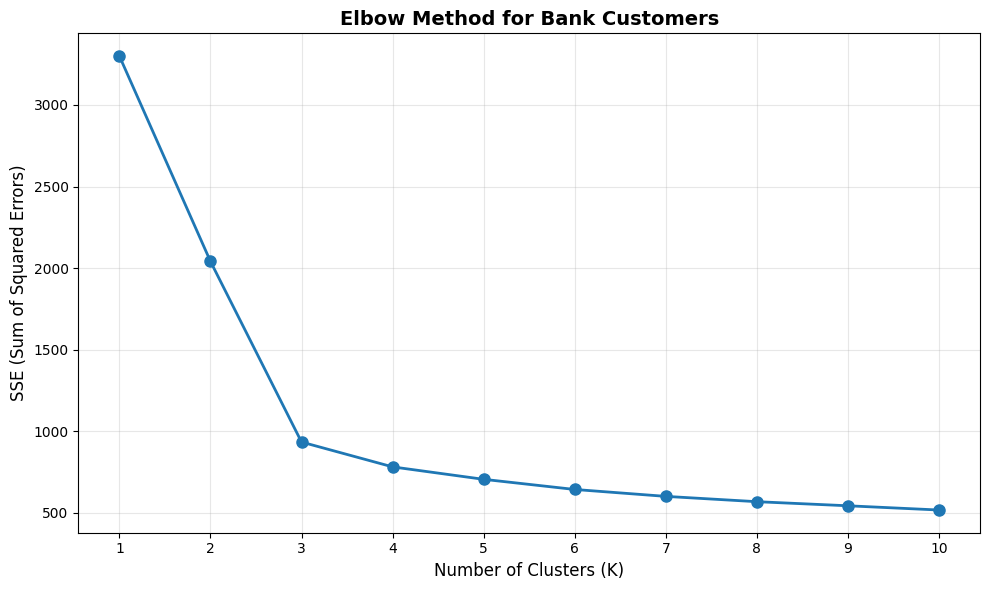


Optimal K : 3


In [10]:
print("\n" + "="*60)
print("ELBOW METHOD - Finding Optimal K")
print("="*60)

sse = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("SSE (Sum of Squared Errors)", fontsize=12)
plt.title("Elbow Method for Bank Customers", fontsize=14, fontweight='bold')
plt.xticks(k_range) 
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

k_elbow = 3

print(f"\nOptimal K : {k_elbow}")

# Evaluation KMeans

In [11]:
print("\n" + "="*60)
print("MODEL EVALUATION")
print("="*60)

final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['cluster'] = final_kmeans.fit_predict(df_scaled)


sil_kmeans = silhouette_score(df_scaled, df["cluster"])
print(f"KMeans Silhouette Score: {sil_kmeans:.4f}")




MODEL EVALUATION
KMeans Silhouette Score: 0.5157


# Visualization KMeans


VISUALIZATION


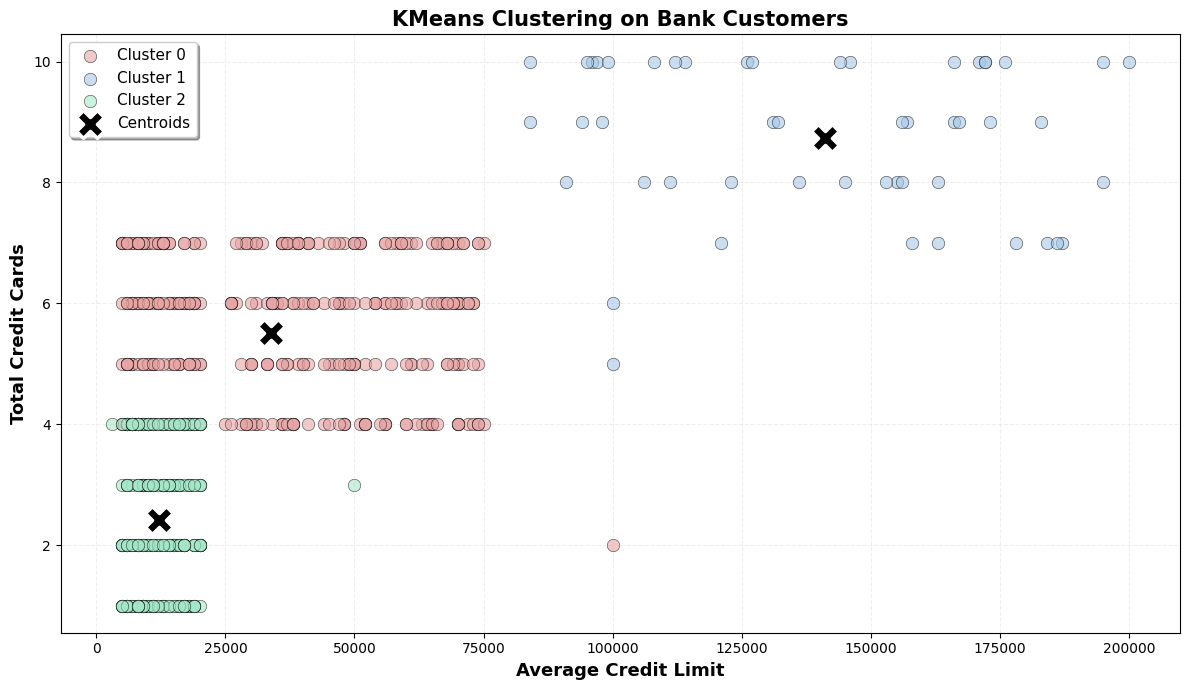

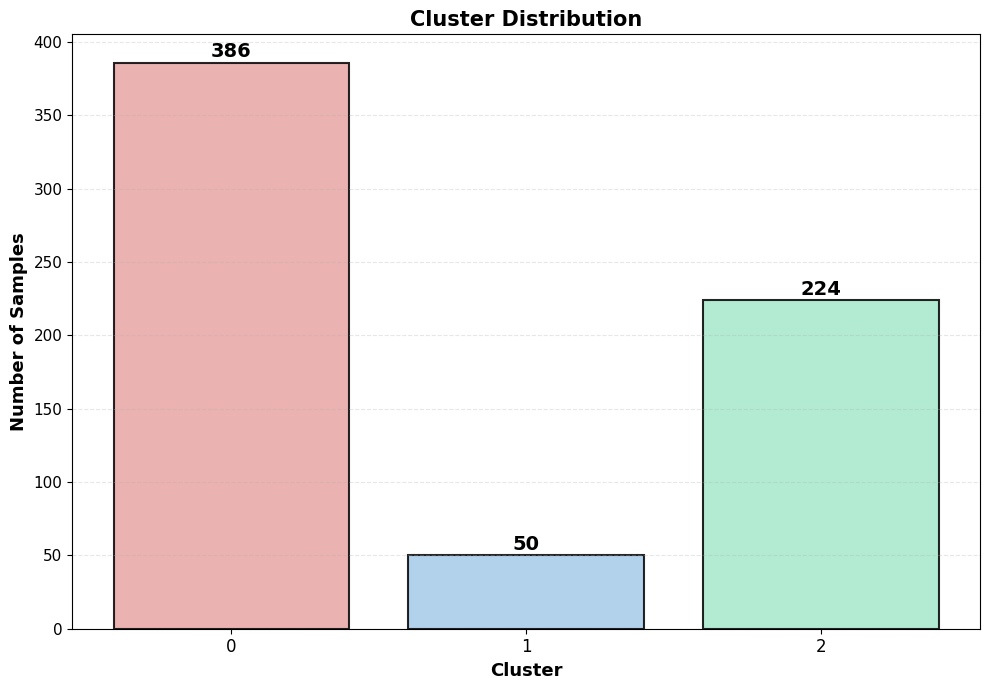



Cluster 0: 386 samples
Cluster 1: 50 samples
Cluster 2: 224 samples


In [12]:
print("\n" + "="*60)
print("VISUALIZATION")
print("="*60)


colors_map = {0: '#E8A5A5', 1: '#A5C9E8', 2: '#A5E8C9'}  
colors = [colors_map[i] for i in range(best_k)]


plt.figure(figsize=(12, 7))

for i in range(best_k):
    subset = df[df['cluster'] == i]
    plt.scatter(subset['Avg_Credit_Limit'], subset['Total_Credit_Cards'],
                c=colors[i], label=f'Cluster {i}', alpha=0.6, s=80, edgecolors='black', linewidth=0.5)

centers = scaler.inverse_transform(final_kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1],
            color='black', marker='X', s=400, 
            edgecolors='white', linewidth=2.5, label='Centroids', zorder=5)

plt.xlabel("Average Credit Limit", fontsize=13, fontweight='bold')
plt.ylabel("Total Credit Cards", fontsize=13, fontweight='bold')
plt.title("KMeans Clustering on Bank Customers", fontsize=15, fontweight='bold')
plt.legend(fontsize=11, frameon=True, shadow=True)
plt.grid(True, alpha=0.2, linestyle='--')
plt.tight_layout()
plt.show()

cluster_counts = df['cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 7))
bars = plt.bar(cluster_counts.index, cluster_counts.values, 
                color=colors, edgecolor='black', linewidth=1.5, alpha=0.85)

for i, (idx, val) in enumerate(cluster_counts.items()):
    plt.text(idx, val + 1, str(val), ha='center', va='bottom', 
                fontsize=14, fontweight='bold')

plt.xlabel("Cluster", fontsize=13, fontweight='bold')
plt.ylabel("Number of Samples", fontsize=13, fontweight='bold')
plt.title("Cluster Distribution", fontsize=15, fontweight='bold')
plt.xticks(cluster_counts.index, fontsize=12)
plt.yticks(fontsize=11)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("\n")
for i in range(best_k):
    count = len(df[df['cluster'] == i])
    print(f"Cluster {i}: {count} samples")